Probemos buscar el mínimo de la función; ejercicio 01

$$ f(x, y) = \frac{1}{2} (a x^2 + b y^2) $$


In [1]:
import numpy as np
from pylab import *
import copy

In [11]:
# r es el vector X,Y; donde r[0] es X y r[1] es Y
# a y b son los coeficientes de la funcion cuadratica
def test_fn(r, a, b):
  return 0.5 * (a * r[0] ** 2 + b * r[1] ** 2)

# esta funcion esta calculada a mano, haciendo la derivada
def grad(r, a, b):
  return [a * r[0], b * r[1]]

aa = 1.0
bb = 0.1

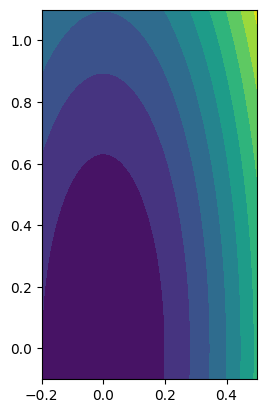

In [12]:
xx = np.linspace(-2*bb, 0.5, num=100)
yy = np.linspace(-bb, 1 + bb, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
rr = np.array([[(x, y) for x in xx] for y in yy])

contourf(X, Y, test_fn([X, Y], aa, bb), levels=10)
gca().set_aspect('equal')

## Metodo del Gradiente Descendiente
$x_{k+1}=x_{n}-\alpha \nabla f(x_{n})$

1. Se elige un punto de salida de manera aleatoria: (x0, y0)
2. Se calcula el gradiente en ese punto: $\nabla f(x_{n})$
3. Se determina el siguiente punto de acuerdo con: $x_{k+1}=x_{n}-\alpha \nabla f(x_{n})$
4. Se detiene el algoritmo con una de las siguientes condiciones de paro:
    - Se llega a un número máximo de iteraciones predeterminado "steps"
    - El tamaño del paso dado por el algoritmo es menor que un valor de tolerancia establecido

In [29]:
# Seteamos la cantidad de iteraciones (pasos) a realizar
Nsteps = 100

#Seteamos nuestro Alfa (tasa de aprendizaje)
step = 2.0 / (1 + bb)

xk = np.zeros(Nsteps + 1)
yk = np.zeros(Nsteps + 1)
fk = np.zeros(Nsteps + 1)

# El punto inicial es (bb, 1.0); nuestro X0
xk[0] = bb
yk[0] = 1.0
fk[0] = test_fn((bb, 1.0), aa, bb)

In [34]:
# Iteramos Nsteps veces, para obtener el nuevo punto
for ii in range(Nsteps):
  xk[ii + 1] = xk[ii] - step * grad((xk[ii], yk[ii]), aa, bb)[0]
  yk[ii + 1] = yk[ii] - step * grad((xk[ii], yk[ii]), aa, bb)[1]

  fk[ii + 1] = test_fn((xk[ii + 1], yk[ii + 1]), aa, bb)

# Punto minimo es
[xk[Nsteps], yk[Nsteps]]

[1.927446925622602e-10, 1.9274469256226112e-09]

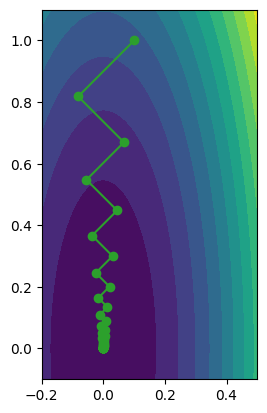

In [35]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(xk, yk, color='C2', marker='o')
gca().set_aspect('equal')

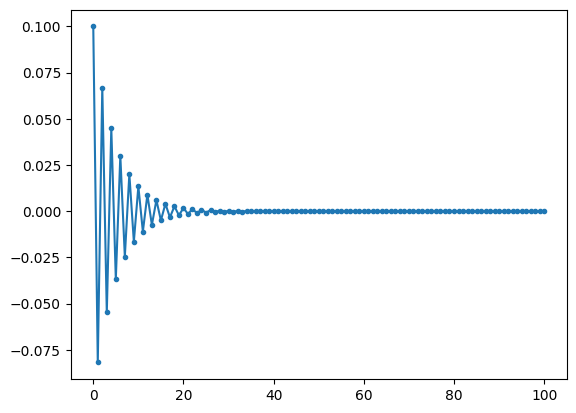

In [36]:
plot(xk, marker='.')